In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df=pd.read_csv("C:\\Users\\Shruti Udagire\\Supervised_Categorical\\Files\\US_Heart_Patients.csv")
df=df.sample(frac=1,random_state=3)
#if any sort of sorting is done on data we want shuffle the data here 1 means 100 percent or all

In [3]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3546,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0,0
1127,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0,0
3088,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0,0
437,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0,0
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1,63,1.0,0,0.0,0.0,0,1,0,260.0,159.5,91.0,27.01,68.0,66.0,0
968,0,54,1.0,0,0.0,0.0,0,1,0,266.0,137.0,88.0,29.76,80.0,80.0,0
1667,0,56,1.0,1,3.0,0.0,0,1,0,285.0,145.0,100.0,30.14,80.0,86.0,0
3321,0,58,2.0,0,0.0,0.0,0,1,1,265.0,143.5,85.0,21.68,91.0,107.0,0


In [4]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

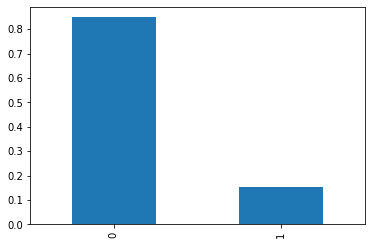

In [5]:
#normalize gives u proportion
df['TenYearCHD'].value_counts(normalize=True).plot(kind='bar')

In [6]:
#display only features that are missing
# df.isnull().sum()
ms=df.isnull().sum()
ms[ms>0]

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

6.214948349534676

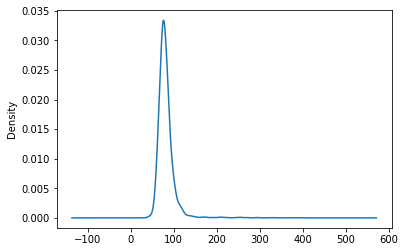

In [7]:
#befor imputation
df['glucose'].plot(kind='kde')
df['glucose'].skew()

In [8]:
# #aftr imputation
# df['glucose']=df['glucose'].fillna(df['glucose'].median())
# df['glucose'].plot(kind='kde')
# df['glucose'].skew()

In [9]:
df=df.fillna(method='ffill')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 3546 to 1688
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 563.1 KB


In [11]:
y=df['TenYearCHD']

In [12]:
X=df.drop('TenYearCHD',axis=1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve
def model_eval(algo,Xtrain,ytrain,Xtest,ytest):
    algo.fit(Xtrain,ytrain)

    #Train
    ytrain_predict=algo.predict(Xtrain)
    ytrain_prob=algo.predict_proba(Xtrain)[:,-1]
    ytrain_predict
    print('Confusion matrix-Train','\n',confusion_matrix(ytrain,ytrain_predict))
    print('Overall Accuracy -Train',accuracy_score(ytrain,ytrain_predict))
    print('AUC - Train',roc_auc_score(ytrain,ytrain_prob))
    
    print("TEST")
    #test
    ytest_pred=algo.predict(Xtest)
    ytest_prob=algo.predict_proba(Xtest)[:,-1]
    print('Confusion matrix-Test','\n',confusion_matrix(ytest,ytest_pred))
    print('Overall Accuracy -Test',accuracy_score(ytest,ytest_pred))
    print('AUC - Test',roc_auc_score(ytest,ytest_prob))

    #plot
    fpr,tpr,thresholds=roc_curve(ytest,ytest_prob)
    plt.plot(fpr,tpr)
    plt.plot(fpr,fpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')

Confusion matrix-Train 
 [[2520   13]
 [ 400   35]]
Overall Accuracy -Train 0.8608490566037735
AUC - Train 0.7313212718551896
TEST
Confusion matrix-Test 
 [[1060    3]
 [ 200    9]]
Overall Accuracy -Test 0.8404088050314465
AUC - Test 0.699491823718194


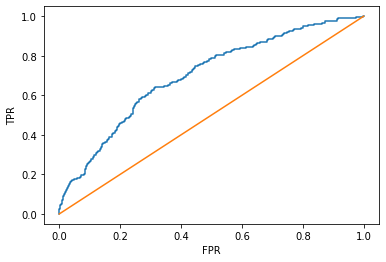

In [16]:
model_eval(lr,X_train,y_train,X_test,y_test)

In [17]:
##Undersampling Majority class

In [18]:
Xytrain=pd.concat([X_train,y_train],axis=1)
print("Before undersampling : ",'\n',Xytrain['TenYearCHD'].value_counts())

#separating o and 1 dataframe
Xytrain0=Xytrain[Xytrain['TenYearCHD']==0]
Xytrain1=Xytrain[Xytrain['TenYearCHD']==1]

len0=len(Xytrain0)
len1=len(Xytrain1)

Xytrain0_us=Xytrain0.sample(len1,random_state=3)
Xytrain_us=pd.concat([Xytrain0_us,Xytrain1],axis=0)

print('\n')
print("after undersampling ",'\n',Xytrain_us['TenYearCHD'].value_counts())

y_train_us=Xytrain_us['TenYearCHD']
x_train_us=Xytrain_us.drop(['TenYearCHD'],axis=1)

Before undersampling :  
 0    2533
1     435
Name: TenYearCHD, dtype: int64


after undersampling  
 1    435
0    435
Name: TenYearCHD, dtype: int64


Confusion matrix-Train 
 [[291 144]
 [137 298]]
Overall Accuracy -Train 0.6770114942528735
AUC - Train 0.7480089840137403
TEST
Confusion matrix-Test 
 [[706 357]
 [ 75 134]]
Overall Accuracy -Test 0.660377358490566
AUC - Test 0.7068871614596228


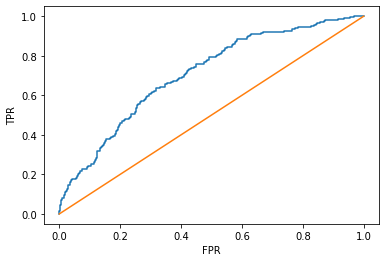

In [19]:
model_eval(lr,x_train_us,y_train_us,X_test,y_test)

In [20]:
### Oversampling minority class

In [21]:
Xytrain=pd.concat([X_train,y_train],axis=1)
print("Before oversampling : ",'\n',Xytrain['TenYearCHD'].value_counts())

Xytrain0=Xytrain[Xytrain['TenYearCHD']==0]
Xytrain1=Xytrain[Xytrain['TenYearCHD']==1]

len0=len(Xytrain0)
len1=len(Xytrain1)

Xytrain1_os=Xytrain1.sample(len0,replace=True,random_state=3)
Xytrain_os=pd.concat([Xytrain1_os,Xytrain0],axis=0)

print("After oversampling : ",'\n',Xytrain_os['TenYearCHD'].value_counts())

x_train_os=Xytrain_os.drop(['TenYearCHD'],axis=1)
y_train_os=Xytrain_os['TenYearCHD']


Before oversampling :  
 0    2533
1     435
Name: TenYearCHD, dtype: int64
After oversampling :  
 1    2533
0    2533
Name: TenYearCHD, dtype: int64


Confusion matrix-Train 
 [[1717  816]
 [ 797 1736]]
Overall Accuracy -Train 0.6816028424792736
AUC - Train 0.7350937619475042
TEST
Confusion matrix-Test 
 [[719 344]
 [ 71 138]]
Overall Accuracy -Test 0.6737421383647799
AUC - Test 0.7098173896213208


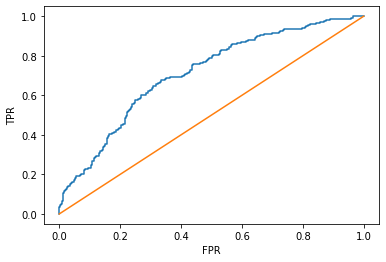

In [22]:
model_eval(lr,x_train_os,y_train_os,X_test,y_test)

In [23]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority',random_state=3)
X_train_sm,y_train_sm=smote.fit_sample(X_train,y_train)

In [24]:
y_train_sm.value_counts()

1    2533
0    2533
Name: TenYearCHD, dtype: int64

Confusion matrix-Train 
 [[1724  809]
 [ 770 1763]]
Overall Accuracy -Train 0.6883142518752468
AUC - Train 0.7501398437584017
TEST
Confusion matrix-Test 
 [[714 349]
 [ 97 112]]
Overall Accuracy -Test 0.64937106918239
AUC - Test 0.6513793677728915


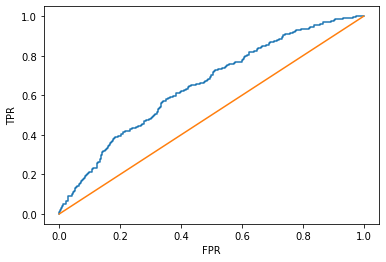

In [25]:
model_eval(lr,X_train_sm,y_train_sm,X_test,y_test)